<H1>Simple Fourier</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# create artificial wave signal
sf = 1000 # samples per second
t = np.arange(0,2, 1/sf) # 5 seconds activity

wave = lambda f: np.sin(2*np.pi*f*t) 
signal = 2.5 * wave(4) + 1.5 * wave(6.5) + 0.5*wave(.4)


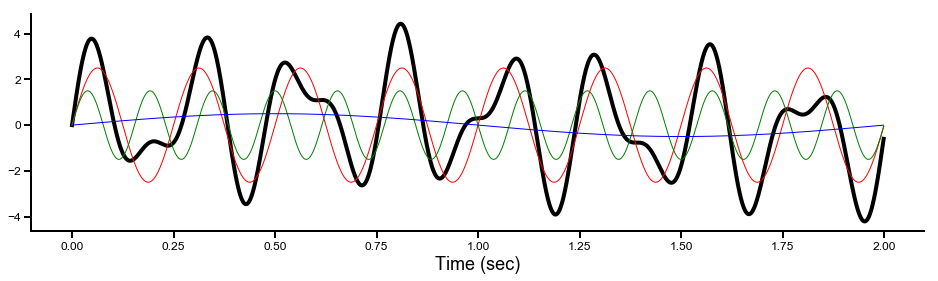

In [3]:
# plot signal and the sum of the waves
plt.figure(figsize=(16,4))
plt.plot(t,signal, lw = 4, color = 'black')
plt.plot(t, 2.5*wave(4), color='red', lw=1)
plt.plot(t, 1.5*wave(6.5), color = 'green', lw = 1)
plt.plot(t, 0.5*wave(0.5), color= 'blue', lw = 1)
plt.xlabel("Time (sec)");

<H2>Discrete Fourier transformation</H2>

In [4]:
# fourTime is the normalized time
fourTime = np.arange(len(signal))/len(signal)

# create a complex wave
csw = lambda freq: np.exp( -1j*2*np.pi*freq*fourTime )

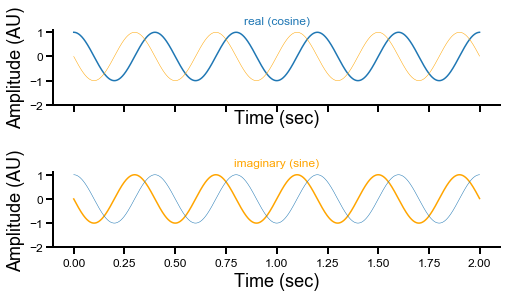

In [5]:
# plot complex wave between t=0 and t=1 in the real and imaginary axis

fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True)
ax[0].plot(t, csw(5).real, lw=1.5)
ax[0].plot(t, csw(5).imag, lw=0.5, color='orange')
ax[0].set_title('real (cosine)', color='C0')

ax[1].plot(t, csw(5).imag, color='orange', lw=1.5)
ax[1].plot(t, csw(5).real, lw=0.5, color='C0')
ax[1].set_title('imaginary (sine)', color='orange')

for myax in ax:
    myax.set_yticks(range(-2,2,1))
    myax.set_xlabel('Time (sec)')
    myax.set_ylabel('Amplitude (AU)')


In [6]:
# dot product of complex waves and signal for waves betwen 0 and half the time of the recording
FourierCoeff = list()
for f in range(len(signal)):
    FourierCoeff.append( np.dot(signal, csw(f)) )

In [7]:
# now compute amplitudes
# extract amplitudes
ampl = 2*np.abs(FourierCoeff)

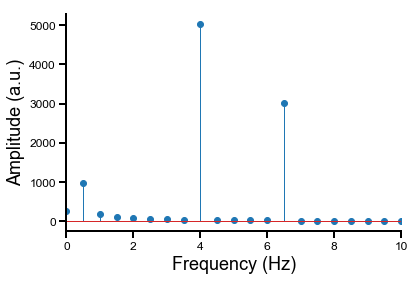

In [8]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(signal)/2.)+1 )

plt.stem(hz,ampl[range(0,len(hz))])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

<H2>A real example</H2>

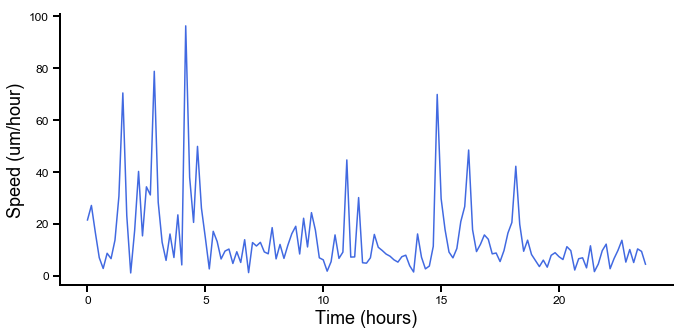

In [9]:
speed = np.loadtxt('speed.txt')
dt = 1/6. # write sampling points in hours -1 (i.e., 6 per hour )

time = np.arange(0, speed.size*dt, dt)

fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(time, speed, color='royalblue', lw  = 1.5);
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');

In [10]:
# fourTime is the normalized time
fourTime = np.arange(len(speed))/len(speed)

# create a complex wave
csw = lambda freq: np.exp( -1j*2*np.pi*freq*fourTime )

In [11]:
# dot product of complex waves and signal for waves betwen 0 and half the time of the recording
FourierCoeff = list()
for f in range(len(speed)):
    FourierCoeff.append( np.dot(speed, csw(f)) )

In [12]:
# now compute amplitudes
# extract amplitudes
ampl = 2*np.abs(FourierCoeff)

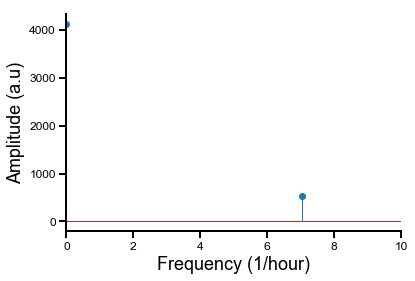

In [15]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )

plt.stem(hz,ampl[range(0,len(hz))])#, use_line_collection = True)
plt.xlabel('Frequency (1/hour)'), plt.ylabel('Amplitude (a.u)')
plt.xlim(0,10)
plt.show()